<a href="https://colab.research.google.com/github/thinhngo-x/Anonymization/blob/alwin/notebook/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
import sklearn
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import confusion_matrix, classification_report
import time
from tqdm import tqdm

In [104]:
from google.colab import drive
drive.mount("/content/drive")
root = "/content/drive/My Drive/Anonymization"

label_map = {
    "CONLL2003" : ["O", "B-MISC", "I-MISC", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC", "I-LOC"],
    "WNUT17" : ["O", "B-location", "I-location", "B-person", "I-person", "B-group", "I-group",
                "B-corporation", "I-corporation", "B-product", "I-product",
                "B-creative-work", "I-creative-work"]
}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. k-NN Classification

In [0]:
n_components = 10
n_neighbors = 30
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

## On **ConLL-2003** pre-processed by BERT

In [106]:
dataset = "/CONLL2003_BERT"

train = np.load(root+dataset+"/representation.train.npy")
train_labels = np.load(root+dataset+"/true_labels.train.npy")
# train_labels = np.logical_or(train_labels == 3, train_labels == 4)

test = np.load(root+dataset+"/representation.testb.npy")
test_labels = np.load(root+dataset+"/true_labels.testb.npy")
# test_labels = np.logical_or(test_labels == 3, test_labels == 4)

random_projection = GaussianRandomProjection(n_components=n_components)
train_projected = random_projection.fit_transform(train)
test_projected = random_projection.transform(test)

print(train.shape)
print(train_projected.shape)

print(test.shape)
print(test_projected.shape)

(203593, 1024)
(203593, 10)
(46417, 1024)
(46417, 10)


In [107]:
knn.fit(train_projected, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [108]:
s = time.time()
preds = knn.predict(test_projected)
print("Time computing : %d s" % (time.time()-s))
print(classification_report(test_labels, preds,
        labels = range(9),
        target_names=["O", "B-MISC", "I-MISC", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC", "I-LOC"]))

Time computing : 44 s
              precision    recall  f1-score   support

           O       0.85      0.99      0.91     38312
      B-MISC       0.00      0.00      0.00         9
      I-MISC       0.33      0.06      0.11       909
       B-PER       0.00      0.00      0.00         0
       I-PER       0.47      0.03      0.06      2769
       B-ORG       0.00      0.00      0.00         5
       I-ORG       0.55      0.12      0.20      2491
       B-LOC       0.00      0.00      0.00         6
       I-LOC       0.64      0.23      0.33      1916

   micro avg       0.84      0.84      0.84     46417
   macro avg       0.32      0.16      0.18     46417
weighted avg       0.79      0.84      0.78     46417



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## On **ConLL-2003** pre-processed by XLNet

In [109]:
dataset = "/CONLL2003_XLNET"

train = np.load(root+dataset+"/representation.train.npy")
train_labels = np.load(root+dataset+"/true_labels.train.npy")
# train_labels = np.logical_or(train_labels == 3, train_labels == 4)

test = np.load(root+dataset+"/representation.testb.npy")
test_labels = np.load(root+dataset+"/true_labels.testb.npy")
# test_labels = np.logical_or(test_labels == 3, test_labels == 4)

random_projection = GaussianRandomProjection(n_components=n_components)
train_projected = random_projection.fit_transform(train)
test_projected = random_projection.transform(test)

print(train.shape)
print(train_projected.shape)

print(test.shape)
print(test_projected.shape)

(203583, 1024)
(203583, 10)
(46377, 1024)
(46377, 10)


In [110]:
knn.fit(train_projected, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [111]:
s = time.time()
preds = knn.predict(test_projected)
print("Time computing : %d s" % (time.time()-s))
print(classification_report(test_labels, preds,
        labels = range(9),
        target_names=["O", "B-MISC", "I-MISC", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC", "I-LOC"]))

Time computing : 28 s
              precision    recall  f1-score   support

           O       0.83      1.00      0.91     38288
      B-MISC       0.00      0.00      0.00         9
      I-MISC       0.12      0.01      0.01       909
       B-PER       0.00      0.00      0.00         0
       I-PER       0.37      0.01      0.03      2758
       B-ORG       0.00      0.00      0.00         5
       I-ORG       0.46      0.03      0.06      2491
       B-LOC       0.00      0.00      0.00         6
       I-LOC       0.47      0.02      0.03      1911

   micro avg       0.83      0.83      0.83     46377
   macro avg       0.25      0.12      0.12     46377
weighted avg       0.75      0.83      0.75     46377



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## On **WNUT17** preprocessed by BERT

In [112]:
dataset = "/WNUT17_BERT"

train = np.load(root+dataset+"/representation.train.npy")
train_labels = np.load(root+dataset+"/true_labels.train.npy")
# train_labels = np.logical_or(train_labels == 3, train_labels == 4)

test = np.load(root+dataset+"/representation.test.npy")
test_labels = np.load(root+dataset+"/true_labels.test.npy")
# test_labels = np.logical_or(test_labels == 3, test_labels == 4)

random_projection = GaussianRandomProjection(n_components=n_components)
train_projected = random_projection.fit_transform(train)
test_projected = random_projection.transform(test)

print(train.shape)
print(train_projected.shape)

print(test.shape)
print(test_projected.shape)

(62730, 1024)
(62730, 10)
(23364, 1024)
(23364, 10)


In [113]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train_projected, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [114]:
s = time.time()
preds = knn.predict(test_projected)
print("Time computing : %d s" % (time.time()-s))
print(classification_report(test_labels, preds,
        labels = range(13),
        target_names=["O", "B-location", "I-location", "B-person", "I-person", "B-group", "I-group",
                    "B-corporation", "I-corporation", "B-product", "I-product",
                    "B-creative-work", "I-creative-work"]))

Time computing : 10 s
                 precision    recall  f1-score   support

              O       0.94      1.00      0.97     21904
     B-location       0.00      0.00      0.00       114
     I-location       0.00      0.00      0.00        33
       B-person       0.00      0.00      0.00       411
       I-person       0.00      0.00      0.00       121
        B-group       0.00      0.00      0.00       154
        I-group       0.00      0.00      0.00        59
  B-corporation       0.00      0.00      0.00        86
  I-corporation       0.00      0.00      0.00        31
      B-product       0.00      0.00      0.00        93
      I-product       0.00      0.00      0.00        55
B-creative-work       0.00      0.00      0.00       131
I-creative-work       0.00      0.00      0.00       172

       accuracy                           0.94     23364
      macro avg       0.07      0.08      0.07     23364
   weighted avg       0.88      0.94      0.91     23364



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2. Logistic Regression for classification

In [0]:
errs_training = {}

In [0]:
def pipeline(dataset, path_train, path_train_label, path_test, path_test_label, label_map, model,
             epocs=1500, optim = None, criteria = nn.CrossEntropyLoss(), use_cuda = True, steps = 50):
    train = torch.Tensor(np.load(root + dataset + path_train))
    train_labels = torch.Tensor(np.load(root + dataset + path_train_label)).type(torch.LongTensor)

    test = torch.Tensor(np.load(root + dataset + path_test))
    test_labels = np.load(root + dataset + path_test_label)

    if use_cuda and torch.cuda.is_available():
        train = train.cuda()
        train_labels = train_labels.cuda()
        test = test.cuda()
        model.cuda()

    if optim == None:
        optim = torch.optim.Adam(model.parameters())

    err_training = []

    for i in tqdm(range(epocs), desc="Training"):
        optim.zero_grad()
        pred = model(train)
        loss = criteria(pred, train_labels)
        if i % steps == steps-1:
            err_training.append(loss.item())
        loss.backward()
        optim.step()

    model.eval()
    s = time.time()
    with torch.no_grad():
        pred = model(test)
    preds = np.argmax(pred.detach().cpu().numpy(), axis=1)
    print("\n")
    print("Time computing: %d s" % (time.time() - s))
    stats = classification_report(test_labels, preds,
                                  labels = range(len(label_map)),
                                  target_names = label_map
                                  )
    print("F2 score for class PERSON is: ",
        sklearn.metrics.fbeta_score(test_labels, preds, 2, labels=[3,4], average=None))
    return err_training, stats

## On **ConLL-2003** pre-processed by BERT

In [117]:
fc = nn.Sequential(
    nn.Linear(1024, 9),
    nn.Sigmoid()
)
s = time.time()
errs, res = pipeline("/CONLL2003_BERT", "/representation.train.npy", "/true_labels.train.npy",
                     "/representation.testb.npy", "/true_labels.testb.npy", label_map["CONLL2003"], fc)
errs_training["Bert + Logistic on ConLL2003"] = errs
print(res)

Training: 100%|██████████| 1500/1500 [00:25<00:00, 58.10it/s]



Time computing: 0 s
F2 score for class PERSON is:  [0.         0.83604496]
              precision    recall  f1-score   support

           O       0.97      0.99      0.98     38312
      B-MISC       0.00      0.00      0.00         9
      I-MISC       0.72      0.63      0.67       909
       B-PER       0.00      0.00      0.00         0
       I-PER       0.92      0.82      0.87      2769
       B-ORG       0.00      0.00      0.00         5
       I-ORG       0.82      0.75      0.78      2491
       B-LOC       0.00      0.00      0.00         6
       I-LOC       0.83      0.74      0.79      1916

   micro avg       0.95      0.95      0.95     46417
   macro avg       0.47      0.44      0.45     46417
weighted avg       0.95      0.95      0.95     46417




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


## On ConLL-2003 pre-processed by XLNet

In [128]:
fc = nn.Sequential(
    nn.Linear(1024, 9),
    nn.Sigmoid()
)
errs, res = pipeline("/CONLL2003_XLNET", "/representation.train.npy", "/true_labels.train.npy",
                     "/representation.testb.npy", "/true_labels.testb.npy", label_map["CONLL2003"], fc)
errs_training["XLNet + Logistic on ConLL2003"] = errs
print(res)

Training: 100%|██████████| 1500/1500 [00:25<00:00, 58.13it/s]



Time computing: 0 s
F2 score for class PERSON is:  [0.         0.32647358]
              precision    recall  f1-score   support

           O       0.85      1.00      0.92     38288
      B-MISC       0.00      0.00      0.00         9
      I-MISC       0.00      0.00      0.00       909
       B-PER       0.00      0.00      0.00         0
       I-PER       0.99      0.28      0.44      2758
       B-ORG       0.00      0.00      0.00         5
       I-ORG       0.87      0.07      0.13      2491
       B-LOC       0.00      0.00      0.00         6
       I-LOC       0.93      0.15      0.26      1911

   micro avg       0.85      0.85      0.85     46377
   macro avg       0.40      0.17      0.19     46377
weighted avg       0.85      0.85      0.80     46377




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


## On WNUT17 preprocessed by BERT

In [119]:
fc = nn.Sequential(
    nn.Linear(1024, len(label_map["WNUT17"])),
    nn.Sigmoid()
)
errs, res = pipeline("/WNUT17_BERT", "/representation.train.npy", "/true_labels.train.npy",
                     "/representation.test.npy", "/true_labels.test.npy", label_map["WNUT17"], fc)
errs_training["Bert + Logistic on WNUT17"] = errs
print(res)

Training: 100%|██████████| 1500/1500 [00:07<00:00, 191.09it/s]



Time computing: 0 s
F2 score for class PERSON is:  [0.09506833 0.0811359 ]
                 precision    recall  f1-score   support

              O       0.94      1.00      0.97     21904
     B-location       0.80      0.14      0.24       114
     I-location       0.00      0.00      0.00        33
       B-person       0.82      0.08      0.14       411
       I-person       0.89      0.07      0.12       121
        B-group       0.00      0.00      0.00       154
        I-group       0.00      0.00      0.00        59
  B-corporation       0.00      0.00      0.00        86
  I-corporation       0.00      0.00      0.00        31
      B-product       0.00      0.00      0.00        93
      I-product       0.00      0.00      0.00        55
B-creative-work       0.00      0.00      0.00       131
I-creative-work       0.00      0.00      0.00       172

       accuracy                           0.94     23364
      macro avg       0.27      0.10      0.11     23364
   weight


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## On WNUT17 preprocessed by XLnet

In [120]:
fc = nn.Sequential(
    nn.Linear(1024, len(label_map["WNUT17"])),
    nn.Sigmoid()
)
errs, res = pipeline("/WNUT17_XLNET", "/representation.train.npy", "/true_labels.train.npy",
                     "/representation.test.npy", "/true_labels.test.npy", label_map["WNUT17"], fc)
errs_training["XLnet + Logistic on WNUT17"] = errs
print(res)

Training: 100%|██████████| 1500/1500 [00:07<00:00, 190.73it/s]



Time computing: 0 s
F2 score for class PERSON is:  [0.03013864 0.        ]
                 precision    recall  f1-score   support

              O       0.94      1.00      0.97     21870
     B-location       0.00      0.00      0.00       114
     I-location       0.00      0.00      0.00        33
       B-person       0.67      0.02      0.05       411
       I-person       0.00      0.00      0.00       121
        B-group       0.00      0.00      0.00       154
        I-group       0.00      0.00      0.00        59
  B-corporation       0.00      0.00      0.00        86
  I-corporation       0.00      0.00      0.00        31
      B-product       0.00      0.00      0.00        93
      I-product       0.00      0.00      0.00        55
B-creative-work       0.00      0.00      0.00       131
I-creative-work       0.00      0.00      0.00       172

       accuracy                           0.94     23330
      macro avg       0.12      0.08      0.08     23330
   weight


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. A fully connected network (FC) with activations ReLu and LogSoftMax

## On **ConLL-2003** pre-processed by BERT

In [121]:
fc = nn.Sequential(
    nn.Linear(1024, 128),
    nn.ReLU(),
    nn.Linear(128, 9),
    nn.LogSoftmax(1)
)
errs, res = pipeline("/CONLL2003_BERT", "/representation.train.npy", "/true_labels.train.npy",
                     "/representation.testb.npy", "/true_labels.testb.npy", label_map["CONLL2003"], fc)
errs_training["Bert + FC on ConLL2003"] = errs
print(res)

Training: 100%|██████████| 1500/1500 [00:40<00:00, 37.09it/s]



Time computing: 0 s
F2 score for class PERSON is:  [0.         0.89227421]
              precision    recall  f1-score   support

           O       0.99      0.99      0.99     38312
      B-MISC       0.00      0.00      0.00         9
      I-MISC       0.65      0.73      0.69       909
       B-PER       0.00      0.00      0.00         0
       I-PER       0.91      0.89      0.90      2769
       B-ORG       0.00      0.00      0.00         5
       I-ORG       0.85      0.85      0.85      2491
       B-LOC       0.00      0.00      0.00         6
       I-LOC       0.86      0.88      0.87      1916

   micro avg       0.96      0.96      0.96     46417
   macro avg       0.47      0.48      0.48     46417
weighted avg       0.96      0.96      0.96     46417




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


## On **ConLL-2003** pre-processed by XLNet

In [122]:
fc = nn.Sequential(
    nn.Linear(1024, 128),
    nn.ReLU(),
    nn.Linear(128, 9),
    nn.LogSoftmax(1)
)
errs, res = pipeline("/CONLL2003_XLNET", "/representation.train.npy", "/true_labels.train.npy",
                     "/representation.testb.npy", "/true_labels.testb.npy", label_map["CONLL2003"], fc)
errs_training["XLNet + FC on ConLL2003"] = errs
print(res)

Training: 100%|██████████| 1500/1500 [00:40<00:00, 37.12it/s]



Time computing: 0 s
F2 score for class PERSON is:  [0.         0.88478261]
              precision    recall  f1-score   support

           O       0.98      0.98      0.98     38288
      B-MISC       0.14      0.11      0.12         9
      I-MISC       0.54      0.60      0.57       909
       B-PER       0.00      0.00      0.00         0
       I-PER       0.88      0.89      0.88      2758
       B-ORG       0.00      0.00      0.00         5
       I-ORG       0.69      0.69      0.69      2491
       B-LOC       0.00      0.00      0.00         6
       I-LOC       0.77      0.77      0.77      1911

   micro avg       0.94      0.94      0.94     46377
   macro avg       0.44      0.45      0.45     46377
weighted avg       0.94      0.94      0.94     46377




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


## On **WNUT17** preprocessed by BERT

In [129]:
fc = nn.Sequential(
    nn.Linear(1024, 128),
    nn.ReLU(),
    nn.Linear(128, len(label_map["WNUT17"])),
    nn.LogSoftmax(1)
)
errs, res = pipeline("/WNUT17_BERT", "/representation.train.npy", "/true_labels.train.npy",
                     "/representation.test.npy", "/true_labels.test.npy", label_map["WNUT17"], fc)
errs_training["Bert + FC on WNUT17"] = errs
print(res)

Training: 100%|██████████| 1500/1500 [00:12<00:00, 120.98it/s]




Time computing: 0 s
F2 score for class PERSON is:  [0.49535604 0.4665493 ]
                 precision    recall  f1-score   support

              O       0.96      0.98      0.97     21904
     B-location       0.33      0.46      0.38       114
     I-location       0.22      0.39      0.28        33
       B-person       0.65      0.47      0.54       411
       I-person       0.63      0.44      0.52       121
        B-group       0.20      0.15      0.17       154
        I-group       0.17      0.07      0.10        59
  B-corporation       0.15      0.13      0.14        86
  I-corporation       0.20      0.03      0.06        31
      B-product       0.14      0.09      0.11        93
      I-product       0.10      0.11      0.10        55
B-creative-work       0.34      0.14      0.20       131
I-creative-work       0.22      0.12      0.15       172

       accuracy                           0.94     23364
      macro avg       0.33      0.27      0.29     23364
   weight

## On **WNUT17** preprocessed by XLNet

In [130]:
fc = nn.Sequential(
    nn.Linear(1024, 128),
    nn.ReLU(),
    nn.Linear(128, len(label_map["WNUT17"])),
    nn.LogSoftmax(1)
)
errs, res = pipeline("/WNUT17_XLNET", "/representation.train.npy", "/true_labels.train.npy",
                     "/representation.test.npy", "/true_labels.test.npy", label_map["WNUT17"], fc)
errs_training["XLNet + FC on WNUT17"] = errs
print(res)

Training: 100%|██████████| 1500/1500 [00:12<00:00, 121.06it/s]




Time computing: 0 s
F2 score for class PERSON is:  [0.37336815 0.37132988]
                 precision    recall  f1-score   support

              O       0.96      0.98      0.97     21870
     B-location       0.24      0.24      0.24       114
     I-location       0.19      0.27      0.22        33
       B-person       0.53      0.35      0.42       411
       I-person       0.45      0.36      0.40       121
        B-group       0.14      0.12      0.13       154
        I-group       0.15      0.12      0.13        59
  B-corporation       0.10      0.07      0.08        86
  I-corporation       0.00      0.00      0.00        31
      B-product       0.16      0.09      0.11        93
      I-product       0.14      0.09      0.11        55
B-creative-work       0.23      0.05      0.09       131
I-creative-work       0.22      0.09      0.12       172

       accuracy                           0.93     23330
      macro avg       0.27      0.22      0.23     23330
   weight

# 4. Graphs

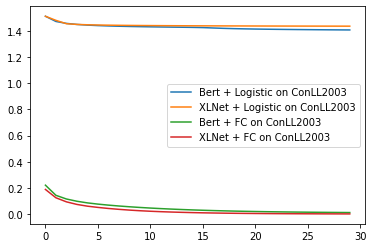

In [131]:
import matplotlib.pyplot as plt


title = ["Bert + Logistic on ConLL2003", "XLNet + Logistic on ConLL2003",
         "Bert + FC on ConLL2003", "XLNet + FC on ConLL2003"]
for i in range(len(title)):
    plt.plot(errs_training[title[i]], label=title[i])

plt.legend()
plt.show()

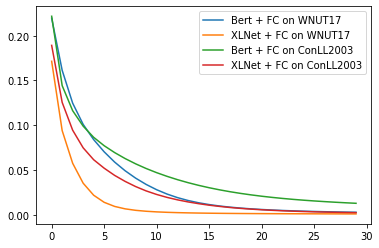

In [132]:
title = ["Bert + FC on WNUT17", "XLNet + FC on WNUT17", "Bert + FC on ConLL2003", "XLNet + FC on ConLL2003"]
for i in range(len(title)):
    plt.plot(errs_training[title[i]], label=title[i])

plt.legend()
plt.show()

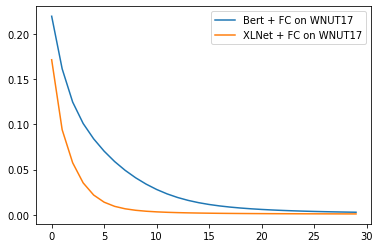

In [133]:
title = ["Bert + FC on WNUT17", "XLNet + FC on WNUT17"]
for i in range(len(title)):
    plt.plot(errs_training[title[i]], label=title[i])

plt.legend()
plt.show()